In [1]:
from src import esma

In [2]:
model = esma.project(project_id='MnTe_Wannier')
model.set_pseudo(path="./Pseudopotentials/PBE/US/SOC")
model.get_structure(format="poscar",path="./Structures/MnTe.poscar")

model.outdir='outdir'
model.set_cores(64)
model.ecutwfc(100) #Set wavefunction cutoff
model.ecutrho(1000) #Set wavefunction cutoff
model.k_points([8,8,5]) #Set number of k points
model.degauss(0.01) #Set degauss value
model.conv_thr(1e-6) #Set convergence threshold
model.smearing('mv')
model.mixing_beta(0.2)
model.electron_maxstep(500) #Max number of electron iteration
model.exchange_maxstep(500) #Max number of exchange iteration
model.hubbard(atom='Mn',orbital='3d',value=3)


In [3]:
afm = model.magnetize(magnetic_atom='Mn',angle1=90,angle2=30)[1]
afm.soc()
afm.debug=True
afm.nbnd(88)
afm.calculate('scf')


bands for afm1 is started
bands for afm1 is finished
bands-pp for afm1 is started
bands-pp for afm1 is finished


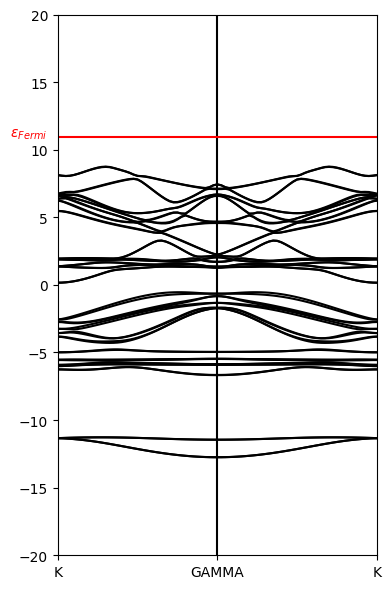

In [4]:
afm.debug=False
label = ['K','GAMMA','K'] #choose corners
points = [[0.33333,0.3333,0],[0,0,0],[0.33333,0.3333,0]]
afm.band_points(label=label,number=40,points=points) #define path
# points = [['GAMMA',0,0,0],['M',0.5,0,0],["M'",0.5,0,0.35],["GAMMA'",0,0,0.35],["K",0.33333,0.3333,0]]
# afm.band_points(path,number=40) #define path
afm.calculate('bands',pp_core=32)
afm.plot('electron',ylim=[-20,20],save=True,figsize=(4,6)) #plot electron bands

In [5]:
afm.scdm_mu(afm.fermi_energy())
afm.scdm_sigma(2)


afm.k_points([12,12,8]) #Set number of k points
afm.calculate('scf')

afm.nosym(True)

afm.k_points([24,24,16],grid=True) #k mesh 
afm.calculate('nscf')

# afm.debug=False
afm.calculate('wannier90')

afm.plot(calculation='wannier90',ylim=[9,13])

scf for afm1 is started
scf for afm1 is finished
nscf for afm1 is started
